In [96]:
## Assignment 62: 5-1
# In the BRFSS (see Section 5.4), the distribution of heights is roughly normal with parameters µ = 178 cm and σ = 7.7 cm for men, and µ = 163 cm and σ = 7.3 cm for women.
# In order to join Blue Man Group, you have to be male between 5’10” and 6’1” (see http://bluemancasting.com). What percentage of the U.S. male population is in this range? 
# Lets calculate the Male %
import scipy.stats

In [97]:
## Mean height for male
mu = 178
## standard deviation 
sigma = 7.7
## Perform the distribution set from the Mu and sigma
dist = scipy.stats.norm(loc=mu, scale=sigma)
type(dist)

scipy.stats._distn_infrastructure.rv_frozen

In [98]:
## Verify the mean and std from the normal distribution set
dist.mean(), dist.std()

(178.0, 7.7)

In [99]:

dist.cdf(mu - sigma)

0.1586552539314574

In [100]:
# Now calculate What percentage of the U.S. male population is in this range?
##  5'10" = 177.8 cm
## evaluate its CDF to determine any people are below the low or height less than equal to 177.8 cm
low = dist.cdf(177.8)  
low

0.48963902786483265

In [101]:
##  6'1" = 185.4 cm
## evaluate its CDF to determine any people are below the high or height less than than equal to 185.4 cm
high = dist.cdf(185.4) 
high

0.8317337108107857

In [102]:
## Detremine how many people are in between the low and high height
high - low

0.3420946829459531

In [103]:
## Ans--> 34% percentage of the U.S. male population is in the height range of 5’10” and 6’1”

In [104]:
# Page 63: 5-2 (To get a feel for the Pareto distribution, let’s see how different the world would be if the distribution of human height were Pareto. With the parameters xm = 1 m and α = 1.7, 
# we get a distribution with a reasonable minimum, 1 m, and median, 1.5 m.)

## Minimum value is 1 meter and standard deviation is 1.7

alpha = 1.7
xmin = 1  # meter
# determine pareto distribution
dist = scipy.stats.pareto(b=alpha, scale=xmin)
# calculate the mdeian value
dist.median()


1.5034066538560549

In [105]:
# What is the mean height in Pareto world? calculate the mean
## Ans--> Mean height is 2.43 meter
dist.mean()

2.428571428571429

In [106]:
# What fraction of people are shorter than the mean?
## Ans-->  Use CDF function to determine the % , around 78% people are shorter than mean height that is 2.43 meter.

dist.cdf(dist.mean())

0.778739697565288

In [107]:
# If there are 7 billion people in Pareto world, how many do we expect to be taller than 1 km?
## Ans --> 1Km = 1000 meter
## Determine % of people shorter than 1KM using CDF
dist.cdf(1000)

0.9999920567176528

In [108]:
## now calculate % of people taller than 1KM using CDF 
(1-0.9999920567176528)

7.943282347211422e-06

In [109]:
## How many are taller than 1 KM from 7 billion people
## Ans--> 55602
(1-0.9999920567176528)*7e9

55602.976430479954

In [110]:
# How tall do we expect the tallest person to be?
## Ans--> we will using 'percent point function", which is the inverse CDF
##. its around 618350 meter
dist.ppf(1 - 1 / 7e9)

618349.6106759505

In [111]:
# Assignmnet Pages 75-76: 6-1
# Load the data file
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/hinc.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/hinc06.csv")

In [112]:
import hinc
income_df = hinc.ReadData()
income_df.head()

,income,freq,cumsum,ps
0,4999.0,4204,4204,0.034330
1,9999.0,4729,8933,0.072947
2,14999.0,6982,15915,0.129963
3,19999.0,7157,23072,0.188407
4,24999.0,7131,30203,0.246640


In [113]:
# Here are the mean and standard deviation of income for normal distribution
mean, std = income_df.mean(), income_df.std()
mean,std
## --> Income normal distribution mean and standard deviation is infinity means its unable to determine,
##    means that we need to go for lognormal model.

(income             inf
 freq      2.915667e+03
 cumsum    8.545155e+04
 ps        6.978029e-01
 dtype: float64,
 income             NaN
 freq       2160.505402
 cumsum    34096.220084
 ps            0.278432
 dtype: float64)

In [114]:
## assumption that the largest income among the respondents is  10e6 or one million dollars.
## Lowest rang of annual household income Under  5000 or 10e3
## Also assumes that incomes in each range are equally spaced on a log10 scale.
## Now define a function InterpolateSample generates a pseudo-sample; that is, 
## a sample of household incomes that yields the same number of respondents in each range as the actual data.

In [115]:
def InterpolateSample(df, log_upper=6.0):
    # compute the log10 of the upper bound for each range
    df['log_upper'] = np.log10(df.income)

    # get the lower bounds by shifting the upper bound and filling in
    # the first element
    df['log_lower'] = df.log_upper.shift(1)
    df.loc[0, 'log_lower'] = 3.0 # 10e3

    # plug in a value for the unknown upper bound of the highest range
    df.loc[41, 'log_upper'] = log_upper # 10e6
    
    # use the freq column to generate the right number of values in
    # each range
    arrays = []
    for _, row in df.iterrows():
        vals = np.linspace(row.log_lower, row.log_upper, int(row.freq))
        arrays.append(vals)

    # collect the arrays into a single sample
    log_sample = np.concatenate(arrays)
    return log_sample

In [116]:
## Load the library and generate the log sample 
import numpy as np
import thinkstats2
import thinkplot
income_df = hinc.ReadData()
log_sample = InterpolateSample(income_df, log_upper=6.0)

In [117]:
log_sample

array([3.        , 3.00016628, 3.00033256, ..., 5.99958621, 5.99979311,
       6.        ])

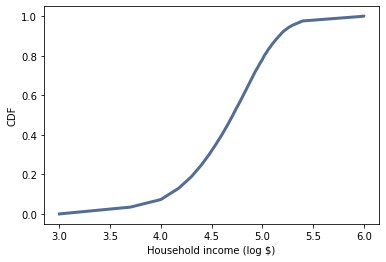

In [118]:
## Perform the CDF operation and plot the income log graph
log_cdf = thinkstats2.Cdf(log_sample)
thinkplot.Cdf(log_cdf)
thinkplot.Config(xlabel='Household income (log $)',
               ylabel='CDF')

In [119]:
# Generate the sample with log base 10
sample = np.power(10, log_sample)

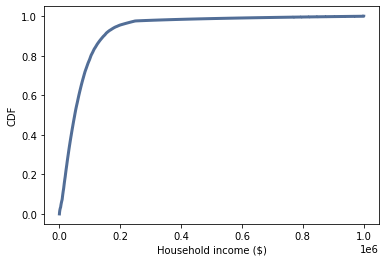

In [120]:
## Print the graph for income in 10e6 (million)
##--> The graph shows that it right skewed 
cdf = thinkstats2.Cdf(sample)
thinkplot.Cdf(cdf)
thinkplot.Config(xlabel='Household income ($)',
               ylabel='CDF')

In [121]:
# Now Compute the median, mean, skewness and Pearson’s skewness of the resulting sample. What fraction of households report a taxable income below the mean? 
# How do the results depend on the assumed upper bound?
## --> Mean income is 74278 
mean = sample.mean()
mean

74278.7075311872

In [122]:
## --> Std income is 74278 
std = sample.std()
std

93946.92996347835

In [123]:
## --> Mean income is 51226.93306562372
from statistics import median
median = median(sample)
median

51226.93306562372

In [124]:
# Determine skewness and Pearson’s skewness of the sample
from scipy.stats import kurtosis, skew
skew(sample)
#, PearsonMedianSkewness(sample)

4.949920244429584

In [125]:
#PearsonMedianSkewness(sample) 
# formula for PearsonMedianSkewness =3 * (mean - median) / std
median,std,mean

(51226.93306562372, 93946.92996347835, 74278.7075311872)

In [126]:
# Pearson’s skewness =0.736 
pskew = 3 * (mean - median) / std
pskew

## --> Both skewness and Pearson’s skewness of the sample are positive means right skew

0.7361105192428792

In [127]:
# What fraction of households report a taxable income below the mean?
## Use CDF to determine this
## ans-- About 66% of the population makes less than the mean
cdf.Prob(sample.mean())

0.660005879566872

In [128]:
# How do the results depend on the assumed upper bound?
## lets consider the upper limit is 10 million(10e7) and then compute the log samle
log_sample2 = InterpolateSample(income_df, log_upper=7.0)
log_sample2


array([3.        , 3.00016628, 3.00033256, ..., 6.99889893, 6.99944946,
       7.        ])

In [129]:
## Log sample for upper limit million 10e6
log_sample

array([3.        , 3.00016628, 3.00033256, ..., 5.99958621, 5.99979311,
       6.        ])

In [ ]:
## Ans--> As we can see the log sample values are changing based on upper limit ,so Without better information about the top of this distribution, we can't say much about the skewness of the distribution